In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\zahee\\Desktop\\Data Science\\Project ExcelR\\telecommunications_churn.csv")
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [3]:
df.drop(['voice_mail_plan','day_charge','evening_charge','night_charge', 'international_charge'],axis=1, inplace=True)
df

,account_length,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,25,265.1,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,26,161.6,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,243.4,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,299.4,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,166.7,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,77,126,83,6,60.10,0
3329,68,0,231.1,153.4,191.3,9.6,3,0,57,55,123,4,63.53,0
3330,28,0,180.8,288.8,191.9,14.1,2,0,109,58,91,6,67.74,0
3331,184,0,213.8,159.6,139.2,5.0,2,1,105,84,137,10,57.53,0


In [4]:
#Splitting data into input and output variables
x=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [5]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X=scale.fit_transform(x)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
np.random.seed(7)

In [7]:
model=Sequential()
model.add(Dense(13,input_dim=13,activation='LeakyReLU'))
model.add(Dropout(0.3))
model.add(Dense(9,activation='LeakyReLU'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history=model.fit(X,Y,validation_split=0.33, epochs=250, batch_size=8)

Epoch 1/250
280/280 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.6538 - val_loss: 0.4293 - val_accuracy: 0.8245
Epoch 2/250
280/280 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8348 - val_loss: 0.3706 - val_accuracy: 0.8364
Epoch 3/250
280/280 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8527 - val_loss: 0.3586 - val_accuracy: 0.8391
Epoch 4/250
280/280 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8665 - val_loss: 0.3558 - val_accuracy: 0.8400
Epoch 5/250
280/280 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8607 - val_loss: 0.3520 - val_accuracy: 0.8391
Epoch 6/250
280/280 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8670 - val_loss: 0.3489 - val_accuracy: 0.8409
Epoch 7/250
280/280 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8710 - val_loss: 0.3463 - val_accuracy: 0.8409

Epoch 58/250
280/280 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.9055 - val_loss: 0.2502 - val_accuracy: 0.9073
Epoch 59/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.9037 - val_loss: 0.2541 - val_accuracy: 0.8955
Epoch 60/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9051 - val_loss: 0.2506 - val_accuracy: 0.9055
Epoch 61/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2653 - accuracy: 0.9024 - val_loss: 0.2527 - val_accuracy: 0.8982
Epoch 62/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2556 - accuracy: 0.9104 - val_loss: 0.2533 - val_accuracy: 0.8945
Epoch 63/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9042 - val_loss: 0.2530 - val_accuracy: 0.9000
Epoch 64/250
280/280 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9055 - val_loss: 0.2537 - val_accuracy:

Epoch 115/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2479 - accuracy: 0.9140 - val_loss: 0.2377 - val_accuracy: 0.9109
Epoch 116/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2398 - accuracy: 0.9118 - val_loss: 0.2367 - val_accuracy: 0.9073
Epoch 117/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.9136 - val_loss: 0.2422 - val_accuracy: 0.9055
Epoch 118/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2481 - accuracy: 0.9095 - val_loss: 0.2366 - val_accuracy: 0.9109
Epoch 119/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2379 - accuracy: 0.9189 - val_loss: 0.2347 - val_accuracy: 0.9164
Epoch 120/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.9127 - val_loss: 0.2386 - val_accuracy: 0.9064
Epoch 121/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9154 - val_loss: 0.2345 - val_ac

280/280 [==============================] - 1s 2ms/step - loss: 0.2480 - accuracy: 0.9136 - val_loss: 0.2266 - val_accuracy: 0.9191
Epoch 172/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.9140 - val_loss: 0.2368 - val_accuracy: 0.9118
Epoch 173/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.9060 - val_loss: 0.2381 - val_accuracy: 0.9082
Epoch 174/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2403 - accuracy: 0.9189 - val_loss: 0.2298 - val_accuracy: 0.9155
Epoch 175/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2394 - accuracy: 0.9172 - val_loss: 0.2319 - val_accuracy: 0.9127
Epoch 176/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2477 - accuracy: 0.9127 - val_loss: 0.2296 - val_accuracy: 0.9136
Epoch 177/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2405 - accuracy: 0.9167 - val_loss: 0.2293 - val_accuracy: 0.9200

280/280 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9176 - val_loss: 0.2272 - val_accuracy: 0.9209
Epoch 228/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.9136 - val_loss: 0.2340 - val_accuracy: 0.9191
Epoch 229/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9163 - val_loss: 0.2319 - val_accuracy: 0.9173
Epoch 230/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2404 - accuracy: 0.9185 - val_loss: 0.2255 - val_accuracy: 0.9209
Epoch 231/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2330 - accuracy: 0.9194 - val_loss: 0.2305 - val_accuracy: 0.9191
Epoch 232/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2459 - accuracy: 0.9167 - val_loss: 0.2278 - val_accuracy: 0.9218
Epoch 233/250
280/280 [==============================] - 1s 2ms/step - loss: 0.2491 - accuracy: 0.9113 - val_loss: 0.2309 - val_accuracy: 0.9145

In [9]:
score=model.evaluate(X,Y)
print(score)
print("The {} of the model is {}".format(model.metrics_names[1],score[1]*100))

105/105 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9271
[0.21215397119522095, 0.9270927309989929]
The accuracy of the model is 92.70927309989929


In [10]:
history.history

{'loss': [0.6758899688720703,
  0.43008485436439514,
  0.3814975917339325,
  0.3643183410167694,
  0.3614404499530792,
  0.3495316505432129,
  0.3438494801521301,
  0.3354218006134033,
  0.33356720209121704,
  0.31998923420906067,
  0.32352152466773987,
  0.3169764280319214,
  0.3045920133590698,
  0.31359636783599854,
  0.3039592206478119,
  0.2958422005176544,
  0.2848430871963501,
  0.28945285081863403,
  0.2852587103843689,
  0.28595229983329773,
  0.2838232219219208,
  0.2843416631221771,
  0.2820906639099121,
  0.2831021547317505,
  0.2744796574115753,
  0.2843891978263855,
  0.2794821262359619,
  0.2781229615211487,
  0.2776193618774414,
  0.2697626054286957,
  0.27702727913856506,
  0.26408594846725464,
  0.2711666226387024,
  0.2781970798969269,
  0.2696070671081543,
  0.27442583441734314,
  0.28300875425338745,
  0.2599937319755554,
  0.26274216175079346,
  0.26683300733566284,
  0.26834166049957275,
  0.28211361169815063,
  0.2686736285686493,
  0.27384936809539795,
  0.2616

In [11]:
model.history.history.keys()

dict_keys([])

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

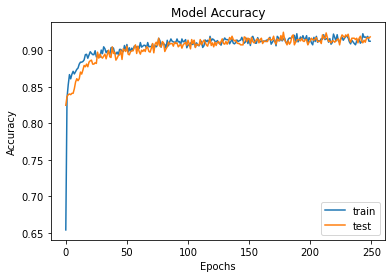

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

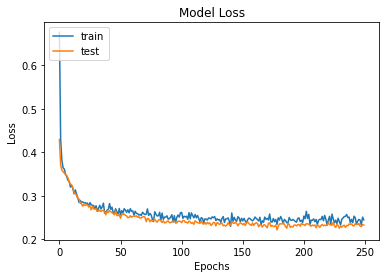

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
y_pred = model.predict(X)
y_pred

105/105 [==============================] - 0s 1ms/step


array([[0.08259274],
       [0.02078491],
       [0.02599247],
       ...,
       [0.08154298],
       [0.1124888 ],
       [0.05783895]], dtype=float32)

In [16]:
y_pred[1][0]

0.020784909

In [17]:
for i in range(len(y_pred)):
    if y_pred[i][0]>0.5:
        y_pred[i][0]=1
    else:
        y_pred[i][0]=0
    print(y_pred[i][0])    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
cm

array([[2830,   20],
       [ 223,  260]], dtype=int64)

### Hence, there are 223 False Negatives owing to class imbalance.

In [43]:
TN=2830
TP=260
FN=223
FP=20

# Sensitivity

In [44]:
sensitivity = (TP/(TP+FN))*100
sensitivity

53.83022774327122

# Specificity

In [45]:
specificity= (TN/(TN+FP))*100
specificity

99.29824561403508

# Precision

In [46]:
precision = (TP/(TP+FP))*100
precision

92.85714285714286

# F score

In [47]:
f_score= (2*precision*sensitivity)/(precision+sensitivity)
f_score

68.15203145478375

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2850
           1       0.93      0.54      0.68       483

    accuracy                           0.93      3333
   macro avg       0.93      0.77      0.82      3333
weighted avg       0.93      0.93      0.92      3333



In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.7656423667865315


Text(0, 0.5, 'True Positive Rate')

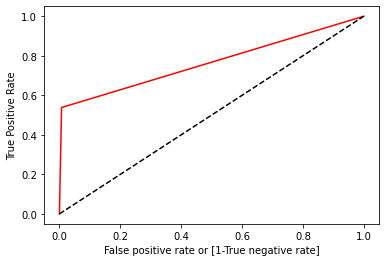

In [51]:
fpr,tpr, thresholds = roc_curve(Y,y_pred)

auc= roc_auc_score(Y,y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr, color='red', label = 'logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('True Positive Rate')

### Optimizing model through Weighted Neural Network or Cost Sensitive Neural Network

In [23]:
model1=Sequential()
model1.add(Dense(13,input_dim=13,activation='LeakyReLU'))
model1.add(Dropout(0.3))
model1.add(Dense(9,activation='LeakyReLU'))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
weights={0:1, 1:6}
history1=model1.fit(X,Y,validation_split=0.33, epochs=500, batch_size=8, class_weight=weights)

Epoch 1/500
280/280 [==============================] - 1s 2ms/step - loss: 1.3431 - accuracy: 0.4837 - val_loss: 0.6692 - val_accuracy: 0.6209
Epoch 2/500
280/280 [==============================] - 1s 2ms/step - loss: 1.1496 - accuracy: 0.6355 - val_loss: 0.5939 - val_accuracy: 0.7645
Epoch 3/500
280/280 [==============================] - 1s 2ms/step - loss: 1.0610 - accuracy: 0.7062 - val_loss: 0.5739 - val_accuracy: 0.7755
Epoch 4/500
280/280 [==============================] - 1s 2ms/step - loss: 1.0216 - accuracy: 0.7223 - val_loss: 0.5565 - val_accuracy: 0.7845
Epoch 5/500
280/280 [==============================] - 1s 2ms/step - loss: 0.9834 - accuracy: 0.7479 - val_loss: 0.5401 - val_accuracy: 0.7936
Epoch 6/500
280/280 [==============================] - 1s 2ms/step - loss: 0.9499 - accuracy: 0.7644 - val_loss: 0.5274 - val_accuracy: 0.7973
Epoch 7/500
280/280 [==============================] - 1s 2ms/step - loss: 0.9460 - accuracy: 0.7703 - val_loss: 0.4927 - val_accuracy: 0.8091

Epoch 58/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7425 - accuracy: 0.8580 - val_loss: 0.3480 - val_accuracy: 0.8873
Epoch 59/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7706 - accuracy: 0.8468 - val_loss: 0.3595 - val_accuracy: 0.8700
Epoch 60/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7419 - accuracy: 0.8531 - val_loss: 0.3591 - val_accuracy: 0.8818
Epoch 61/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7332 - accuracy: 0.8603 - val_loss: 0.3475 - val_accuracy: 0.8855
Epoch 62/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7337 - accuracy: 0.8571 - val_loss: 0.3529 - val_accuracy: 0.8818
Epoch 63/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7171 - accuracy: 0.8554 - val_loss: 0.3456 - val_accuracy: 0.8882
Epoch 64/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7548 - accuracy: 0.8625 - val_loss: 0.3538 - val_accuracy:

Epoch 115/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7073 - accuracy: 0.8585 - val_loss: 0.3307 - val_accuracy: 0.8982
Epoch 116/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7113 - accuracy: 0.8683 - val_loss: 0.3305 - val_accuracy: 0.9009
Epoch 117/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7371 - accuracy: 0.8688 - val_loss: 0.3550 - val_accuracy: 0.8827
Epoch 118/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7228 - accuracy: 0.8603 - val_loss: 0.3510 - val_accuracy: 0.8891
Epoch 119/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7017 - accuracy: 0.8603 - val_loss: 0.3311 - val_accuracy: 0.8927
Epoch 120/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7101 - accuracy: 0.8657 - val_loss: 0.3394 - val_accuracy: 0.8900
Epoch 121/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7065 - accuracy: 0.8648 - val_loss: 0.3381 - val_ac

280/280 [==============================] - 1s 2ms/step - loss: 0.7187 - accuracy: 0.8661 - val_loss: 0.3333 - val_accuracy: 0.8927
Epoch 172/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.8630 - val_loss: 0.3253 - val_accuracy: 0.8955
Epoch 173/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7147 - accuracy: 0.8648 - val_loss: 0.3328 - val_accuracy: 0.8918
Epoch 174/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7360 - accuracy: 0.8549 - val_loss: 0.3492 - val_accuracy: 0.8818
Epoch 175/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7269 - accuracy: 0.8567 - val_loss: 0.3419 - val_accuracy: 0.8882
Epoch 176/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7180 - accuracy: 0.8585 - val_loss: 0.3244 - val_accuracy: 0.8991
Epoch 177/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7535 - accuracy: 0.8733 - val_loss: 0.3500 - val_accuracy: 0.8864

280/280 [==============================] - 1s 2ms/step - loss: 0.7158 - accuracy: 0.8746 - val_loss: 0.3302 - val_accuracy: 0.8991
Epoch 228/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.8728 - val_loss: 0.3215 - val_accuracy: 0.8991
Epoch 229/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.8679 - val_loss: 0.3194 - val_accuracy: 0.9018
Epoch 230/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7304 - accuracy: 0.8768 - val_loss: 0.3281 - val_accuracy: 0.8909
Epoch 231/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.8764 - val_loss: 0.3183 - val_accuracy: 0.9027
Epoch 232/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.8710 - val_loss: 0.3175 - val_accuracy: 0.9009
Epoch 233/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7058 - accuracy: 0.8737 - val_loss: 0.3261 - val_accuracy: 0.9000

280/280 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.8746 - val_loss: 0.3187 - val_accuracy: 0.9064
Epoch 284/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7271 - accuracy: 0.8665 - val_loss: 0.3424 - val_accuracy: 0.8891
Epoch 285/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7278 - accuracy: 0.8598 - val_loss: 0.3421 - val_accuracy: 0.8955
Epoch 286/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7157 - accuracy: 0.8643 - val_loss: 0.3390 - val_accuracy: 0.8964
Epoch 287/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7022 - accuracy: 0.8674 - val_loss: 0.3426 - val_accuracy: 0.8900
Epoch 288/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7102 - accuracy: 0.8701 - val_loss: 0.3409 - val_accuracy: 0.8936
Epoch 289/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.8701 - val_loss: 0.3346 - val_accuracy: 0.8936

280/280 [==============================] - 1s 2ms/step - loss: 0.6804 - accuracy: 0.8688 - val_loss: 0.3233 - val_accuracy: 0.8955
Epoch 340/500
280/280 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.8755 - val_loss: 0.3260 - val_accuracy: 0.8936
Epoch 341/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.8657 - val_loss: 0.3197 - val_accuracy: 0.8973
Epoch 342/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7282 - accuracy: 0.8688 - val_loss: 0.3256 - val_accuracy: 0.8945
Epoch 343/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.8697 - val_loss: 0.3137 - val_accuracy: 0.9027
Epoch 344/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6714 - accuracy: 0.8706 - val_loss: 0.3122 - val_accuracy: 0.9018
Epoch 345/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7167 - accuracy: 0.8710 - val_loss: 0.3262 - val_accuracy: 0.8973

280/280 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.8737 - val_loss: 0.3381 - val_accuracy: 0.8909
Epoch 396/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6770 - accuracy: 0.8643 - val_loss: 0.3278 - val_accuracy: 0.8955
Epoch 397/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7432 - accuracy: 0.8657 - val_loss: 0.3341 - val_accuracy: 0.8964
Epoch 398/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.8665 - val_loss: 0.3236 - val_accuracy: 0.9018
Epoch 399/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7048 - accuracy: 0.8742 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 400/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7102 - accuracy: 0.8648 - val_loss: 0.3227 - val_accuracy: 0.9009
Epoch 401/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6562 - accuracy: 0.8795 - val_loss: 0.3292 - val_accuracy: 0.8955

280/280 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.8657 - val_loss: 0.3261 - val_accuracy: 0.8955
Epoch 452/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7211 - accuracy: 0.8621 - val_loss: 0.3301 - val_accuracy: 0.8936
Epoch 453/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7096 - accuracy: 0.8639 - val_loss: 0.3290 - val_accuracy: 0.8955
Epoch 454/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6655 - accuracy: 0.8768 - val_loss: 0.3152 - val_accuracy: 0.8991
Epoch 455/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7135 - accuracy: 0.8665 - val_loss: 0.3296 - val_accuracy: 0.8945
Epoch 456/500
280/280 [==============================] - 1s 2ms/step - loss: 0.7062 - accuracy: 0.8706 - val_loss: 0.3301 - val_accuracy: 0.8964
Epoch 457/500
280/280 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.8773 - val_loss: 0.3252 - val_accuracy: 0.8945

In [25]:
score=model1.evaluate(X,Y)
print(score)
print("The {} of the model is {}".format(model1.metrics_names[1],score[1]*100))

105/105 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8911
[0.32350412011146545, 0.8910890817642212]
The accuracy of the model is 89.10890817642212


In [26]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

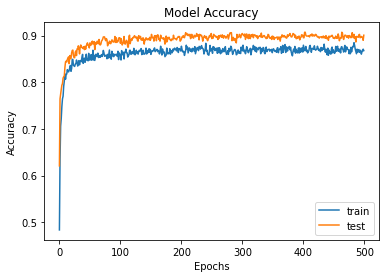

In [27]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

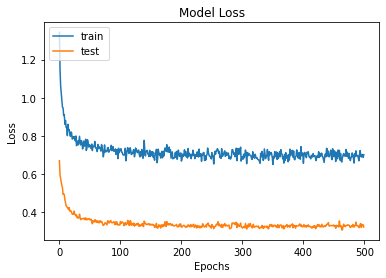

In [28]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [29]:
y_pred1 = model1.predict(X)
y_pred1

105/105 [==============================] - 0s 994us/step


array([[0.28154027],
       [0.13937245],
       [0.09953772],
       ...,
       [0.19239898],
       [0.45157877],
       [0.1873397 ]], dtype=float32)

In [30]:
for i in range(len(y_pred1)):
    if y_pred1[i][0]>0.5:
        y_pred1[i][0]=1
    else:
        y_pred1[i][0]=0
    print(y_pred1[i][0]) 

0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0


In [31]:
cm1 = confusion_matrix(Y,y_pred1)
cm1

array([[2560,  290],
       [  73,  410]], dtype=int64)

In [34]:
TN=2560
TP=410
FP=290
FN=73

# Sensitivity

In [35]:
sensitivity = (TP/(TP+FN))*100
sensitivity

84.88612836438924

# Specificity

In [36]:
specificity= (TN/(TN+FP))*100
specificity

89.82456140350877

# Precision

In [37]:
precision = (TP/(TP+FP))*100
precision

58.57142857142858

# F score

In [39]:
f_score= (2*precision*sensitivity)/(precision+sensitivity)
f_score

69.31530008453086

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2850
           1       0.59      0.85      0.69       483

    accuracy                           0.89      3333
   macro avg       0.78      0.87      0.81      3333
weighted avg       0.92      0.89      0.90      3333



In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.8735534488394899


Text(0, 0.5, 'True Positive Rate')

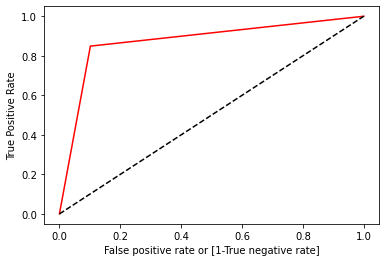

In [42]:
fpr,tpr, thresholds = roc_curve(Y,y_pred1)

auc= roc_auc_score(Y,y_pred1)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr, color='red', label = 'logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('True Positive Rate')

### Hence, we can see that although the overall accuracy of neural network model has decreased slightly from 92.71% to 89.11%,the model is able to predcit the classes more accurately.